# Steel Fault Classifier

*Predicting Defects in Industrial Plates Using Machine Learning*

**Author:** Virginia Herrero

## Introduction

This project presents a complete machine learning workflow aimed at predicting the type of defect or anomaly found in industrial steel plates. The notebook guides the reader through each stage of the process, including data preprocessing, model training, and evaluation, while outlining the techniques used throughout.

The dataset was selected due to its relevance to Industry 4.0 and quality control. Anomaly detection in industrial products is a practical example to showcase skills in data engineering and data science. The project demonstrates how data-driven methods can support quality management and decision making in a variety of industries.

This project was originally developed as part of a technical screening and has been adapted for portfolio purposes.

## Dataset

The dataset used in this project was sourced from Kaggle, available [here](https://www.kaggle.com/datasets/uciml/faulty-steel-plates).

It includes the following variables:


- `X_Minimum`

- `X_Maximum`

- `Y_Minimum`

- `Y_Maximum`

- `Pixels_Areas`

- `X_Perimeter`

- `Y_Perimeter`

- `Sum_of_Luminosity`

- `Minimum_of_Luminosity`

- `Maximum_of_Luminosity`

- `Length_of_Conveyer`

- `TypeOfSteel_A300`

- `TypeOfSteel_A400`

- `Steel_Plate_Thickness`

- `Edges_Index`

- `Empty_Index`

- `Square_Index`

- `Outside_X_Index`

- `Edges_X_Index`

- `Edges_Y_Index`

- `Outside_Global_Index`

- `LogOfAreas`

- `Log_X_Index`

- `Log_Y_Index`

- `Orientation_Index`

- `Luminosity_Index`

- `SigmoidOfAreas`

The dataset includes seven types of defects found in steel plates:

- `Pastry`

- `Z_Scratch`

- `K_Scatch`

- `Stains`

- `Dirtiness`

- `Bumps`

- `Other_Faults`

## Data loading

Load the steel-plates-faults-dataset CSV file as a pandas DataFrame.

In [1]:
# Project setup
%run ../notebooks/setup_path.py
from config import *

# Import all required libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Normalizing
from sklearn.preprocessing import StandardScaler

# Modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve

# Hypertuning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Re-sampling
from imblearn.over_sampling import SMOTE

# Saving the model
import pickle

In [2]:
# Load the dataset
df = pd.read_csv(RAW_DIR / "Steel-plates-faults-dataset.csv")
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


## Data cleaning

Clean and preprocess the dataset before moving on to the analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

- **Rename columns**

Some columns were renamed to improve readability and make the dataset easier to understand.

In [4]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [5]:
df = df.rename(columns = {"TypeOfSteel_A300" : "Steel_Type_A300",
                          "TypeOfSteel_A400" : "Steel_Type_A400",
                          "LogOfAreas" : "Log_of_Areas",
                          "SigmoidOfAreas" : "Sigmoid_of_Areas",
                          "K_Scatch" : "K_Scratch"})

In [6]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,Sigmoid_of_Areas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


- **Data types**

Make sure all columns have the appropriate data types.

In [7]:
df.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
Steel_Type_A300            int64
Steel_Type_A400            int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
Log_of_Areas             float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
Sigmoid_of_Areas         float64
Pastry                     int64
Z_Scratch                  int64
K_Scratch                  int64
Stains    

- **Null Values**

Identify and remove any null values in the dataset when necessary.

In [8]:
# Check the total of null values in each column
df.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
Steel_Type_A300          0
Steel_Type_A400          0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
Log_of_Areas             0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
Sigmoid_of_Areas         0
Pastry                   0
Z_Scratch                0
K_Scratch                0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

There are no null values in the dataset.

- **Duplicate Values**

Check for any duplicate entries in the dataset.

In [9]:
df.duplicated().sum()

0

There are no duplicate entries in the dataset.

- **Outliers**

Review the dataset’s statistical summary to identify potential outliers. This initial check helps spot any unusual values that may require further analysis.

In [10]:
# Changes float format to display two decimals
pd.set_option("display.float_format", "{:.2f}".format)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.00,571.14,520.69,0.00,51.00,435.00,1053.00,1705.00
X_Maximum,1941.00,617.96,497.63,4.00,192.00,467.00,1072.00,1713.00
Y_Minimum,1941.00,1650684.87,1774578.41,6712.00,471253.00,1204128.00,2183073.00,12987661.00
Y_Maximum,1941.00,1650738.71,1774590.09,6724.00,471281.00,1204136.00,2183084.00,12987692.00
Pixels_Areas,1941.00,1893.88,5168.46,2.00,84.00,174.00,822.00,152655.00
X_Perimeter,1941.00,111.86,301.21,2.00,15.00,26.00,84.00,10449.00
Y_Perimeter,1941.00,82.97,426.48,1.00,13.00,25.00,83.00,18152.00
Sum_of_Luminosity,1941.00,206312.15,512293.59,250.00,9522.00,19202.00,83011.00,11591414.00
Minimum_of_Luminosity,1941.00,84.55,32.13,0.00,63.00,90.00,106.00,203.00
Maximum_of_Luminosity,1941.00,130.19,18.69,37.00,124.00,127.00,140.00,253.00


At first glance, columns like **X\_Minimum**, **X\_Maximum**, **Y\_Minimum**, **Y\_Maximum**, **Pixel\_Areas**, **X\_Perimeter**, **Y\_Perimeter**, **Sum\_of\_Luminosity**, and **Steel\_plate\_thickness** may contain outliers. This is based on the fact that the maximum values exceed the mean, median, and third quartile, which could indicate the presence of unusual values. Since these outliers can be clear indicators of defects in the steel plates, I decided to keep them in the dataset. This approach helps preserve the observations and contributes to better model predictions.

- **The clean dataset:**

In [12]:
defect_detection = df.copy()
defect_detection.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,Sigmoid_of_Areas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.82,-0.29,0.58,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.79,-0.18,0.30,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.67,-0.12,0.21,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.84,-0.16,0.52,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.93,-0.20,1.00,1,0,0,0,0,0,0


In [13]:
# Save the cleaned dataset
defect_detection.to_csv(PROCESSED_DIR / "Steel-plates-faults-cleaned-dataset.csv")

## Exploratory Data Analysis

This section presents an in-depth exploratory data analysis.

### **Target Variable**

The first step is to examine the target variable to get an overview of its distribution.

The goal of this project is to predict defects in steel plates. The dataset includes seven columns, each representing a possible defect. These seven columns make up the target variables for this problem.

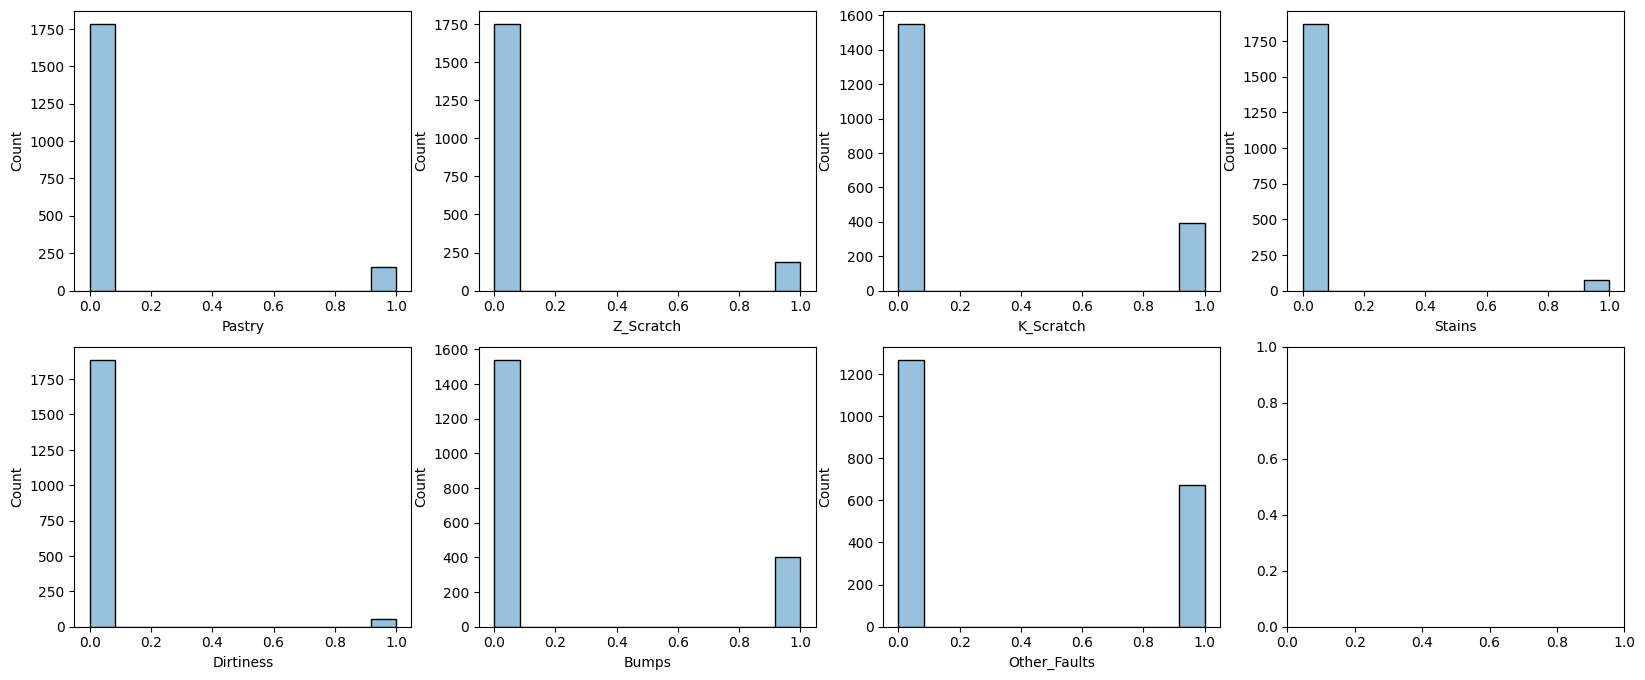

In [14]:
# Plot distribution of all target columns on the datasest
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
ax = ax.flatten()
for i, col in enumerate(defect_detection.columns[-7:]):
    sns.histplot(defect_detection[col], ax = ax[i], color = "#74add1")

Verifica si hay observaciones sin fallos.

In [15]:
# List of fault columns
faults = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

# Get the observations with no faults
no_faults = defect_detection[defect_detection[faults].sum(axis = 1) == 0]

# Display the results
if no_faults.empty:
    print("There are no observations with no faults.")
else:
    print("Number of observations with no faults:")
    print(no_faults)

There are no observations with no faults.


From this quick analysis, it can be concluded that there are no observations without defects. Next, check if any defects occur simultaneously in the same observation.

In [16]:
# Sum defect values per row
defect_detection[faults].sum(axis = 1).value_counts()

1    1941
Name: count, dtype: int64

It is confirmed that each observation contains only one type of defect. Therefore, this problem remains a multiclass classification rather than a multilabel classification. The next step is to take a look at the distribution of all defects to get a clear idea of how many observations there are for each defect type.

In [17]:
sum_faults = defect_detection[faults].sum().sort_values(ascending=True)
sum_faults

Dirtiness        55
Stains           72
Pastry          158
Z_Scratch       190
K_Scratch       391
Bumps           402
Other_Faults    673
dtype: int64

The distribution of defect types in the steel plates shows that the most common defect is other faults, followed by bumps and k_scratch. The least frequent defect in the dataset is dirtiness.

The dataset has a clear imbalance, as the number of instances varies widely between defect classes. This issue will need to be addressed during the modeling stage. Some common techniques for handling imbalanced datasets include resampling, using algorithms that are robust to class imbalance, and applying metrics that account for class distribution, such as the F1-score and the precision-recall curve

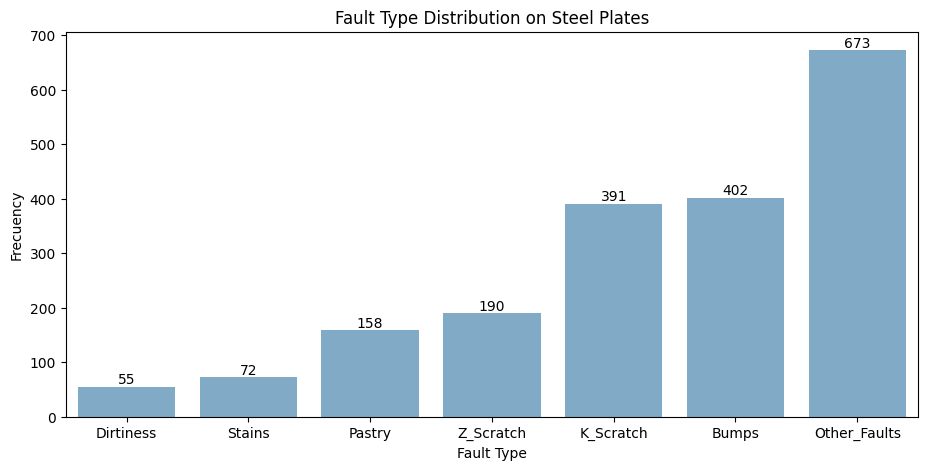

In [18]:
fault_types_distribution_graph = plt.figure(figsize = (11, 5))
ax = sns.barplot(sum_faults, color = "#74add1")
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Fault Type")
plt.ylabel("Frecuency")
plt.title("Fault Type Distribution on Steel Plates", size = 12)
plt.savefig(FIGURES_DIR / "fault-type-distribution.png")

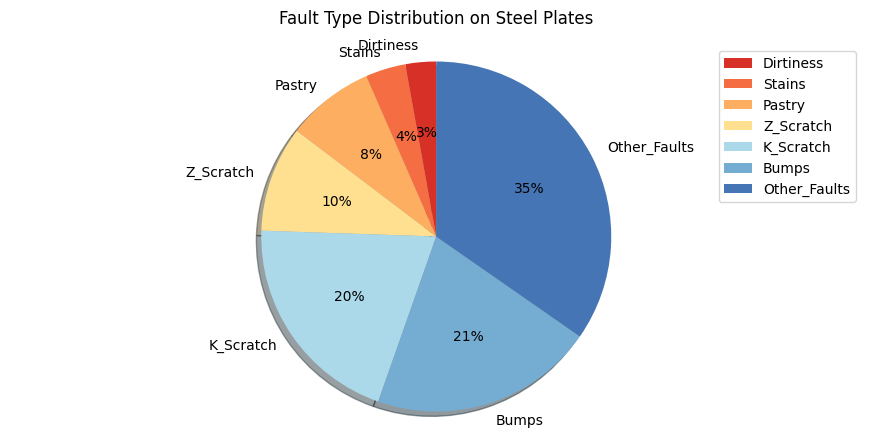

In [19]:
fault_types_distribution_pie = plt.figure(figsize = (11, 5))
colors = ["#d73027", "#f46d43", "#fdae61", "#fee090", "#abd9e9", "#74add1", "#4575b4"]
plt.pie(sum_faults, labels = sum_faults.index, startangle = 90, autopct = "%1.0f%%", shadow = True, colors = colors)
plt.axis("equal")
plt.legend()
plt.title("Fault Type Distribution on Steel Plates", pad = 15)
plt.savefig(FIGURES_DIR / "fault-type-distribution-pie-chart.png")

### **Features**

The next step is to examine each feature in the dataset to get an overview of their distributions. Since all features are on different scales, scaling will be necessary in later steps.

The histograms reveal useful insights about the feature distributions:

- **Normal distribution**: Maximum\_of\_Luminosity, Empty\_Index, Square\_Index, Luminosity\_Index, Minimum\_of\_Luminosity, and Orientation\_Index.
- **Skewed distribution**: Y\_Minimum, Y\_Maximum, Pixels\_Areas, X\_Perimeter, Y\_Perimeter, Sum\_of\_Luminosity, Log\_Y\_Index, and Edges\_X\_Index.
- **Uniform distribution**: X\_Minimum, X\_Maximum, EdgesIndex, Edges\_Y\_Index, and SigmoidOfAreas.

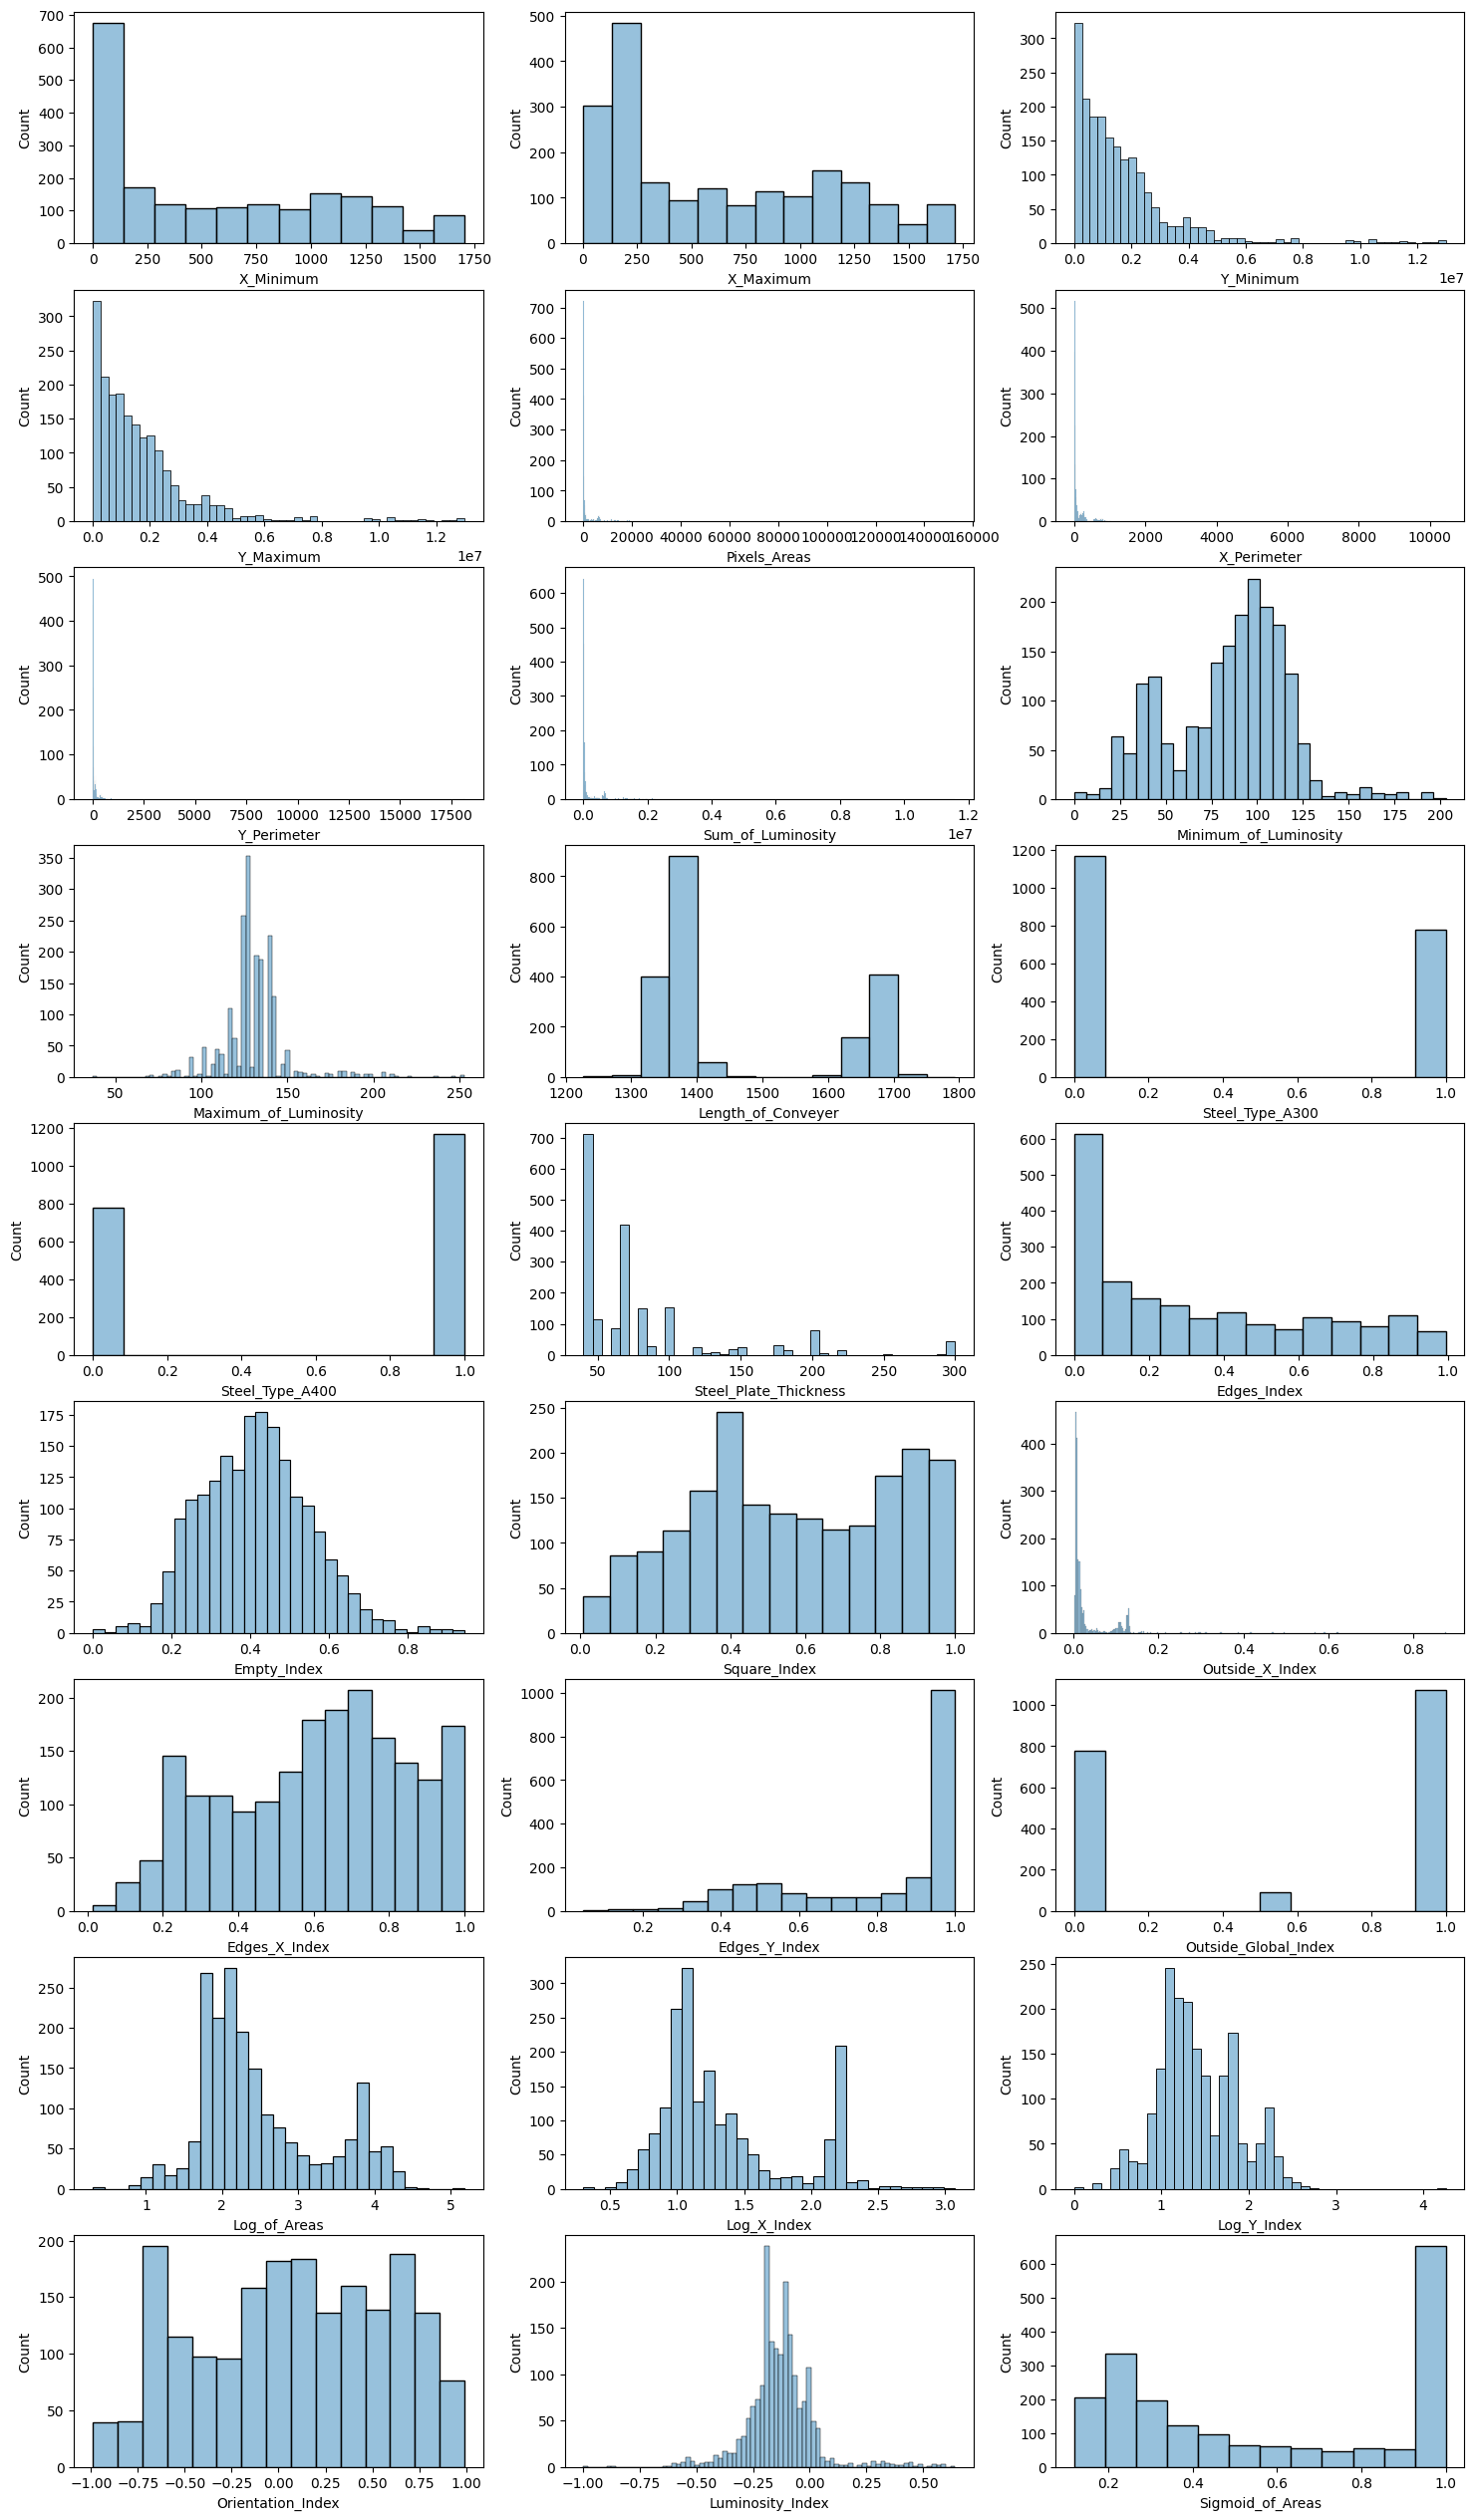

In [20]:
# Plot distribution of all features on the datasest
fig, ax = plt.subplots(9, 3, figsize = (18, 32))
for i, col in enumerate(defect_detection.columns[:27]):
    sns.histplot(defect_detection[col], ax = ax[i//3][i%3], color = "#74add1")

#### **Matriz de correlación**

In [21]:
correlations = defect_detection.corr()
correlations

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,Sigmoid_of_Areas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.00,0.99,0.04,0.04,-0.31,-0.26,-0.12,-0.34,0.24,-0.08,...,0.18,-0.03,-0.36,0.13,-0.23,-0.42,0.07,0.10,0.22,0.16
X_Maximum,0.99,1.00,0.05,0.05,-0.23,-0.19,-0.09,-0.25,0.17,-0.06,...,0.12,-0.04,-0.29,0.12,-0.26,-0.34,0.06,0.10,0.20,0.15
Y_Minimum,0.04,0.05,1.00,1.00,0.02,0.02,0.02,0.01,-0.07,-0.07,...,-0.09,-0.09,0.03,0.04,-0.06,-0.00,-0.07,0.06,0.13,-0.08
Y_Maximum,0.04,0.05,1.00,1.00,0.02,0.02,0.02,0.01,-0.07,-0.07,...,-0.09,-0.09,0.03,0.04,-0.06,-0.00,-0.07,0.06,0.13,-0.08
Pixels_Areas,-0.31,-0.23,0.02,0.02,1.00,0.97,0.83,0.98,-0.50,0.11,...,-0.14,-0.04,0.42,-0.08,-0.09,0.56,-0.07,-0.05,-0.16,-0.18
X_Perimeter,-0.26,-0.19,0.02,0.02,0.97,1.00,0.91,0.91,-0.40,0.11,...,-0.10,-0.03,0.38,-0.08,-0.06,0.46,-0.07,-0.04,-0.14,-0.14
Y_Perimeter,-0.12,-0.09,0.02,0.02,0.83,0.91,1.00,0.70,-0.21,0.06,...,0.03,-0.05,0.19,-0.02,-0.03,0.20,-0.04,-0.01,-0.07,-0.07
Sum_of_Luminosity,-0.34,-0.25,0.01,0.01,0.98,0.91,0.70,1.00,-0.54,0.14,...,-0.16,-0.01,0.46,-0.08,-0.10,0.62,-0.08,-0.06,-0.18,-0.21
Minimum_of_Luminosity,0.24,0.17,-0.07,-0.07,-0.50,-0.40,-0.21,-0.54,1.00,0.43,...,0.06,0.67,-0.51,-0.07,0.05,-0.46,0.18,0.09,0.08,0.23
Maximum_of_Luminosity,-0.08,-0.06,-0.07,-0.07,0.11,0.11,0.06,0.14,0.43,1.00,...,-0.17,0.87,-0.04,-0.06,-0.19,0.19,0.09,0.02,-0.05,-0.01


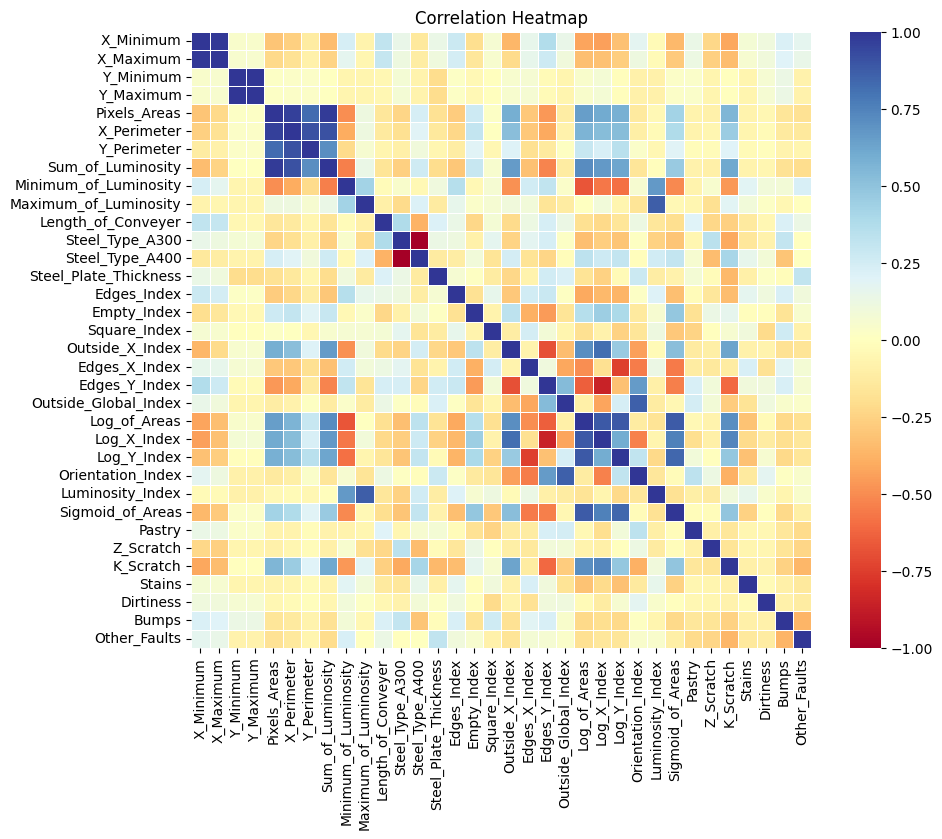

In [22]:
correlation_heatmap_graph = plt.figure(figsize = (10, 8))
sns.heatmap(correlations, linewidths = 0.5, cmap = "RdYlBu")
plt.title("Correlation Heatmap", size = 12)
plt.savefig(FIGURES_DIR / "correlation-heatmap-before-feature-engineering.png")

The correlation matrix shows the relationships between variables: red indicates a negative correlation, blue indicates a positive correlation, and yellow means little or no correlation. Since many features are highly correlated, it is necessary to create new features from them to reduce the total number of variables in the dataset and make modeling easier.

## Feature Engineering

Based on the results from the correlation matrix, new variables are created. Features that are no longer necessary will be removed from the dataset.

In [23]:
# Create new variables
defect_detection["X_Range"] = defect_detection["X_Maximum"] - defect_detection["X_Minimum"]
defect_detection["Y_Range"] = defect_detection["Y_Maximum"] - defect_detection["Y_Minimum"]
defect_detection["Defect_Area"] = (defect_detection["X_Perimeter"] * defect_detection["Y_Perimeter"])
defect_detection["Luminosity_Range"] = defect_detection["Maximum_of_Luminosity"] - defect_detection["Minimum_of_Luminosity"]
defect_detection["Edge"] = defect_detection["Edges_Index"] / (defect_detection["Edges_X_Index"] * defect_detection["Edges_Y_Index"])
defect_detection["Outside_X_Range"] = defect_detection["Outside_X_Index"] * defect_detection["X_Range"]
defect_detection["Log_Area"] = defect_detection["Log_of_Areas"] / (0.000001 + defect_detection["Log_X_Index"] * defect_detection ["Log_Y_Index"])
defect_detection["Luminosity_Sum_Range"] = defect_detection["Sum_of_Luminosity"] * defect_detection["Luminosity_Range"]
defect_detection["Log_Area_Sigmoid"] = defect_detection["Log_Area"] * defect_detection["Sigmoid_of_Areas"]

In [24]:
defect_detection.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Type_A300', 'Steel_Type_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index',
       'Log_of_Areas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index',
       'Luminosity_Index', 'Sigmoid_of_Areas', 'Pastry', 'Z_Scratch',
       'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'X_Range',
       'Y_Range', 'Defect_Area', 'Luminosity_Range', 'Edge', 'Outside_X_Range',
       'Log_Area', 'Luminosity_Sum_Range', 'Log_Area_Sigmoid'],
      dtype='object')

In [25]:
# Drop unnecessary columns
columns_to_drop = ["X_Minimum", "X_Maximum", "Y_Minimum", "Y_Maximum", "X_Perimeter", "Y_Perimeter", "Minimum_of_Luminosity", "Maximum_of_Luminosity",
                   "Outside_X_Index", "Edges_Index", "Edges_X_Index", "Edges_Y_Index","Log_of_Areas", "Log_X_Index", "Log_Y_Index", "Sum_of_Luminosity", 
                   "Luminosity_Range", "Sigmoid_of_Areas"]

defect_detection = defect_detection.drop(columns_to_drop, axis = 1)
defect_detection

,Pixels_Areas,Length_of_Conveyer,Steel_Type_A300,Steel_Type_A400,Steel_Plate_Thickness,Empty_Index,Square_Index,Outside_Global_Index,Orientation_Index,Luminosity_Index,...,Bumps,Other_Faults,X_Range,Y_Range,Defect_Area,Edge,Outside_X_Range,Log_Area,Luminosity_Sum_Range,Log_Area_Sigmoid
0,267,1687,1,0,80,0.24,0.18,1.00,0.82,-0.29,...,0,0,8,44,748,0.11,0.04,1.63,775040,0.95
1,108,1687,1,0,80,0.38,0.21,1.00,0.79,-0.18,...,0,0,6,29,300,1.32,0.02,1.79,444483,0.53
2,71,1623,1,0,100,0.34,0.33,1.00,0.67,-0.12,...,0,0,6,18,152,1.37,0.02,1.90,207272,0.41
3,176,1353,0,1,290,0.44,0.16,1.00,0.84,-0.16,...,0,0,7,45,585,1.35,0.04,1.61,512892,0.84
4,2409,1353,0,1,185,0.45,0.07,1.00,0.93,-0.20,...,0,0,17,257,15600,0.25,0.21,1.14,21976770,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,273,1360,0,1,40,0.39,0.57,0.00,-0.43,0.00,...,0,1,28,16,1188,0.97,0.58,1.40,770726,1.01
1937,287,1360,0,1,40,0.46,0.55,0.00,-0.45,-0.06,...,0,1,31,17,1056,0.42,0.71,1.34,726579,1.09
1938,292,1360,0,1,40,0.33,0.52,0.00,-0.48,0.01,...,0,1,29,15,880,0.43,0.62,1.43,751440,1.01
1939,419,1360,0,1,40,0.59,0.94,0.00,-0.06,-0.02,...,0,1,33,31,4559,0.90,0.80,1.16,1212445,1.15


In [26]:
# Show columns after dropping the unnecessary ones
defect_detection.columns

Index(['Pixels_Areas', 'Length_of_Conveyer', 'Steel_Type_A300',
       'Steel_Type_A400', 'Steel_Plate_Thickness', 'Empty_Index',
       'Square_Index', 'Outside_Global_Index', 'Orientation_Index',
       'Luminosity_Index', 'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'X_Range', 'Y_Range',
       'Defect_Area', 'Edge', 'Outside_X_Range', 'Log_Area',
       'Luminosity_Sum_Range', 'Log_Area_Sigmoid'],
      dtype='object')

In [27]:
# Plot again the correlation matrix with the new features
correlations_2 = defect_detection.corr()
correlations_2

,Pixels_Areas,Length_of_Conveyer,Steel_Type_A300,Steel_Type_A400,Steel_Plate_Thickness,Empty_Index,Square_Index,Outside_Global_Index,Orientation_Index,Luminosity_Index,...,Bumps,Other_Faults,X_Range,Y_Range,Defect_Area,Edge,Outside_X_Range,Log_Area,Luminosity_Sum_Range,Log_Area_Sigmoid
Pixels_Areas,1.00,-0.16,-0.24,0.24,-0.18,0.27,0.02,-0.11,-0.14,-0.04,...,-0.16,-0.18,0.59,0.73,0.68,-0.03,0.32,-0.01,0.98,-0.01
Length_of_Conveyer,-0.16,1.00,0.38,-0.38,0.21,-0.23,0.07,0.13,0.12,-0.15,...,0.23,0.13,-0.20,-0.04,-0.02,-0.01,-0.09,-0.02,-0.13,-0.02
Steel_Type_A300,-0.24,0.38,1.00,-1.00,0.13,-0.09,0.16,0.02,0.01,-0.25,...,0.31,-0.01,-0.24,-0.05,-0.02,-0.03,-0.07,-0.03,-0.22,-0.03
Steel_Type_A400,0.24,-0.38,-1.00,1.00,-0.13,0.09,-0.16,-0.02,-0.01,0.25,...,-0.31,0.01,0.24,0.05,0.02,0.03,0.07,0.03,0.22,0.03
Steel_Plate_Thickness,-0.18,0.21,0.13,-0.13,1.00,0.01,-0.12,0.22,0.27,-0.12,...,-0.02,0.32,-0.23,-0.02,-0.02,0.08,-0.08,-0.02,-0.18,-0.02
Empty_Index,0.27,-0.23,-0.09,0.09,0.01,1.00,-0.08,-0.17,-0.14,0.06,...,-0.17,0.05,0.34,0.13,0.09,0.14,0.21,-0.10,0.26,-0.10
Square_Index,0.02,0.07,0.16,-0.16,-0.12,-0.08,1.00,-0.07,-0.16,0.11,...,0.26,-0.09,-0.11,-0.07,-0.04,-0.18,-0.11,-0.01,0.07,-0.01
Outside_Global_Index,-0.11,0.13,0.02,-0.02,0.22,-0.17,-0.07,1.00,0.86,-0.12,...,0.04,0.04,-0.34,0.04,0.02,0.07,-0.16,-0.04,-0.09,-0.04
Orientation_Index,-0.14,0.12,0.01,-0.01,0.27,-0.14,-0.16,0.86,1.00,-0.15,...,0.01,0.04,-0.44,0.07,0.04,0.13,-0.22,-0.04,-0.11,-0.04
Luminosity_Index,-0.04,-0.15,-0.25,0.25,-0.12,0.06,0.11,-0.12,-0.15,1.00,...,-0.06,0.04,-0.04,-0.06,-0.04,0.12,-0.01,0.03,-0.01,0.03


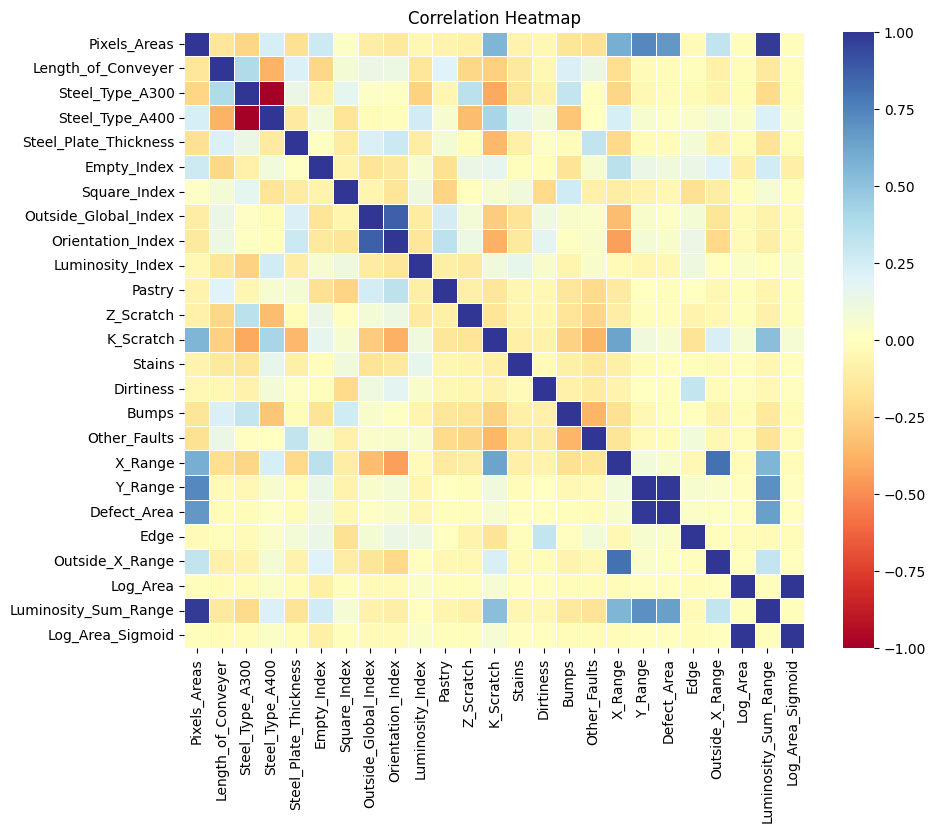

In [28]:
correlation_heatmap_graph_2 = plt.figure(figsize = (10, 8))
sns.heatmap(correlations_2, linewidths = 0.5, cmap = "RdYlBu")
plt.title("Correlation Heatmap", size = 12)
plt.savefig(FIGURES_DIR / "correlation-heatmap-after-feature-engineering.png")

In [29]:
# Save the feature engineered dataset
defect_detection.to_csv(FEATURE_ENG_DIR / "Steel-plates-faults-feature-engineering-dataset.csv")

## Pre-processing

Before starting the modeling phase, some transformations need to be applied to the dataset.

- **New Fault Column**

Create a new column that combines all defect types. This column will serve as the target variable and make modeling and prediction easier.

In [30]:
# List of faults and their corresponding values
fault_mapping = {"Pastry": 0, "Z_Scratch": 1, "K_Scratch": 2, "Stains": 3, "Dirtiness": 4, "Bumps": 5, "Other_Faults": 6}

# Initialize the Faults column
defect_detection["Faults"] = 0

# Loop through each fault and assign the corresponding value
for fault, value in fault_mapping.items():
    defect_detection.loc[defect_detection[fault] == 1, "Faults"] = value

# Display the first few rows
defect_detection.head()

,Pixels_Areas,Length_of_Conveyer,Steel_Type_A300,Steel_Type_A400,Steel_Plate_Thickness,Empty_Index,Square_Index,Outside_Global_Index,Orientation_Index,Luminosity_Index,...,Other_Faults,X_Range,Y_Range,Defect_Area,Edge,Outside_X_Range,Log_Area,Luminosity_Sum_Range,Log_Area_Sigmoid,Faults
0,267,1687,1,0,80,0.24,0.18,1.00,0.82,-0.29,...,0,8,44,748,0.11,0.04,1.63,775040,0.95,0
1,108,1687,1,0,80,0.38,0.21,1.00,0.79,-0.18,...,0,6,29,300,1.32,0.02,1.79,444483,0.53,0
2,71,1623,1,0,100,0.34,0.33,1.00,0.67,-0.12,...,0,6,18,152,1.37,0.02,1.90,207272,0.41,0
3,176,1353,0,1,290,0.44,0.16,1.00,0.84,-0.16,...,0,7,45,585,1.35,0.04,1.61,512892,0.84,0
4,2409,1353,0,1,185,0.45,0.07,1.00,0.93,-0.20,...,0,17,257,15600,0.25,0.21,1.14,21976770,1.14,0


In [31]:
# Drop individual fault columns
defect_detection.drop(faults, axis = 1, inplace=True)

In [32]:
defect_detection.head()

,Pixels_Areas,Length_of_Conveyer,Steel_Type_A300,Steel_Type_A400,Steel_Plate_Thickness,Empty_Index,Square_Index,Outside_Global_Index,Orientation_Index,Luminosity_Index,X_Range,Y_Range,Defect_Area,Edge,Outside_X_Range,Log_Area,Luminosity_Sum_Range,Log_Area_Sigmoid,Faults
0,267,1687,1,0,80,0.24,0.18,1.00,0.82,-0.29,8,44,748,0.11,0.04,1.63,775040,0.95,0
1,108,1687,1,0,80,0.38,0.21,1.00,0.79,-0.18,6,29,300,1.32,0.02,1.79,444483,0.53,0
2,71,1623,1,0,100,0.34,0.33,1.00,0.67,-0.12,6,18,152,1.37,0.02,1.90,207272,0.41,0
3,176,1353,0,1,290,0.44,0.16,1.00,0.84,-0.16,7,45,585,1.35,0.04,1.61,512892,0.84,0
4,2409,1353,0,1,185,0.45,0.07,1.00,0.93,-0.20,17,257,15600,0.25,0.21,1.14,21976770,1.14,0


- **Data Splitting**

When splitting the data into training and test sets, scaling is applied only to the training data. This prevents any information from the test set from leaking into the model during training.

In [33]:
# Independent features
X = defect_detection.drop("Faults", axis = 1)

# Dependent or target variable
y = defect_detection["Faults"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Training set - X_train shape:", X_train.shape)
print("Testing set - X_test shape:", X_test.shape)
print("Training set - y_train shape:", y_train.shape)
print("Testing set - y_test shape:", y_test.shape)

Training set - X_train shape: (1552, 18)
Testing set - X_test shape: (389, 18)
Training set - y_train shape: (1552,)
Testing set - y_test shape: (389,)


- **Feature Scaling**

The method used is standard scaling.

In [34]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Modeling

The goal of this project is to build a model that classifies defects in industrial steel plates. The first step is to find the algorithm with the best performance. From there, hyperparameters will be fine-tuned to get the best version of the winning model. The algorithms chosen to start the modeling process are **Decision Tree**, **Random Forest**, **XGBoost**, **Support Vector Machine**, and **Multilayer Perceptron**.

Decision Tree Model:
              precision    recall  f1-score   support

           0       0.43      0.45      0.44        29
           1       0.81      0.83      0.82        41
           2       0.94      0.93      0.93        83
           3       0.86      0.92      0.89        13
           4       0.44      0.50      0.47         8
           5       0.49      0.61      0.55        72
           6       0.71      0.61      0.65       143

    accuracy                           0.70       389
   macro avg       0.67      0.69      0.68       389
weighted avg       0.71      0.70      0.70       389

Random Forest Model:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        29
           1       0.95      0.90      0.93        41
           2       0.98      0.95      0.96        83
           3       1.00      0.92      0.96        13
           4       0.60      0.38      0.46         8
           5       0.61      0.57   

Text(0, 0.5, 'Valor real')

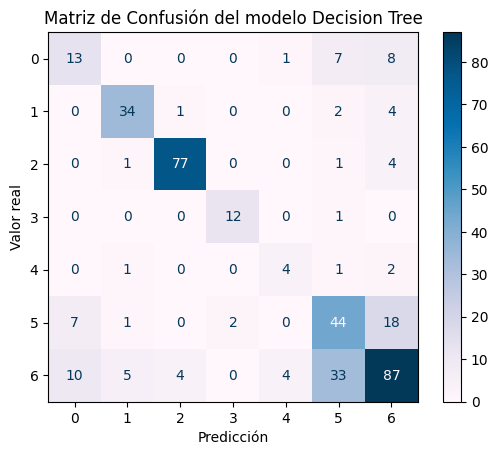

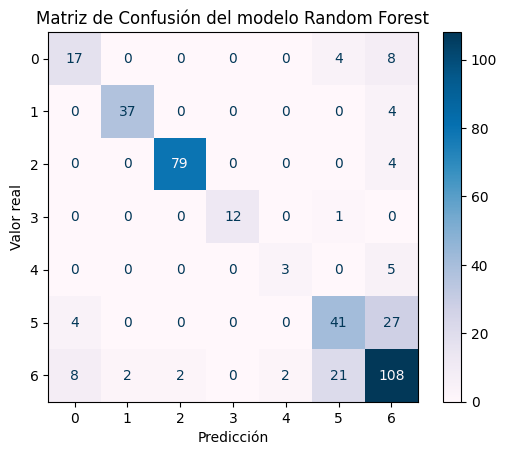

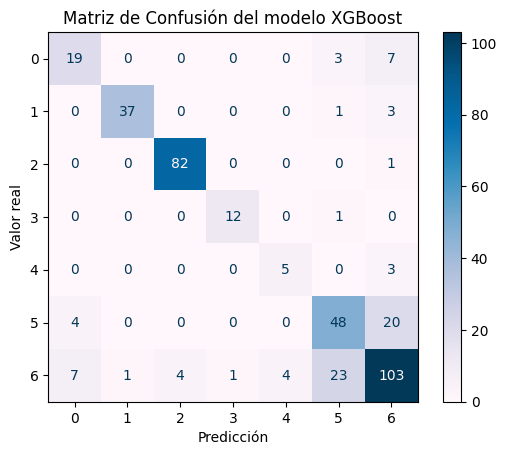

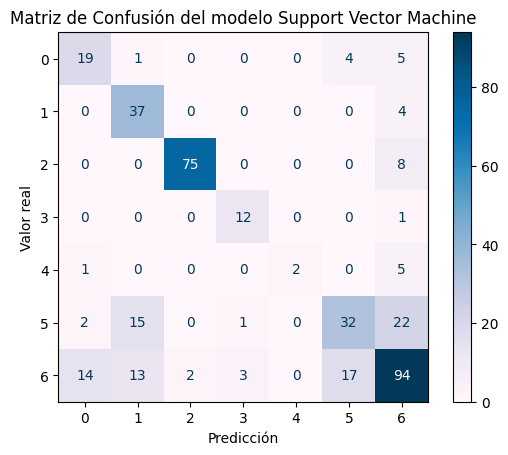

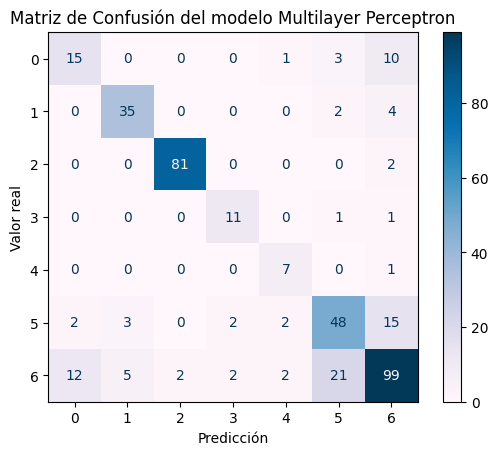

In [35]:
# 1. Decision Tree
print("Decision Tree Model:")
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
print(classification_report(y_test, dt_predictions))
dt_cm = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(confusion_matrix = dt_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo Decision Tree")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

# 2. Random Forest
print("Random Forest Model:")
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
print(classification_report(y_test, rf_predictions))
rf_cm = confusion_matrix(y_test, rf_predictions)
ConfusionMatrixDisplay(confusion_matrix = rf_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

# 3. XGBoost
print("XGBoost Model:")
xgb_model = XGBClassifier(random_state = 42)
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, xgb_predictions))
xgb_cm = confusion_matrix(y_test, xgb_predictions)
ConfusionMatrixDisplay(confusion_matrix = xgb_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

# 4. Support Vector Machine
print("Support Vector Machine Model:")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
print(classification_report(y_test, svm_predictions))
svm_cm = confusion_matrix(y_test, svm_predictions)
ConfusionMatrixDisplay(confusion_matrix = svm_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo Support Vector Machine")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

# 5. Multilayer Perceptron
print("Multilayer Perceptron Model:")
mlp_model = MLPClassifier(random_state = 42, max_iter = 500)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
print(classification_report(y_test, mlp_predictions))
mlp_cm = confusion_matrix(y_test, mlp_predictions)
ConfusionMatrixDisplay(confusion_matrix = mlp_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo Multilayer Perceptron")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

Among all the models tested, XGBoost stands out as the most effective, achieving an accuracy of 0.79 and performing well in both precision and recall across several classes. Its average macro F1-score of 0.78 further highlights its balanced performance.

Random Forest and Multilayer Perceptron follow closely with an accuracy of 0.76. Both deliver solid results but do not quite match XGBoost’s effectiveness. On the other hand, Decision Tree and Support Vector Machine reach only 0.70 accuracy, struggling more with classifying some categories.

XGBoost is the best choice when aiming to maximize model accuracy and maintain balanced performance. Additionally, further hyperparameter tuning could take its results to the next level.

## XGBoost

XGBoost was selected as the model to tackle this classification task. Now it’s time to understand the model better and find the best hyperparameters.

### **Hyperparameter Tuning**

First, the model is optimized to improve its performance. This tuned model performs better than the original, but it still struggles to classify minority classes, such as class 4, which corresponds to the defect “dirtiness” and has very few observations in the dataset. To address this issue, a sampling technique is needed. Since the observations are scarce, I chose to use **SMOTE** to improve classification.

In [36]:
# Define the model
model = xgb.XGBClassifier(random_state = 42)

# Define the hyperparameter grid
param_grid = {"max_depth": [3, 5, 7],
              "learning_rate": [0.01, 0.1, 0.2],
              "n_estimators": [100, 200, 300],
              "subsample": [0.6, 0.8, 1.0]}

# Set up Grid Search
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid,
                           scoring = "f1_macro",
                           cv = 3,
                           verbose = 1,
                           n_jobs = -1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.7630419064415506
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        29
           1       0.95      0.93      0.94        41
           2       0.96      0.99      0.98        83
           3       1.00      0.92      0.96        13
           4       0.57      0.50      0.53         8
           5       0.60      0.62      0.61        72
           6       0.74      0.73      0.74       143

    accuracy                           0.79       389
   macro avg       0.79      0.77      0.78       389
weighted avg       0.79      0.79      0.79       389



#### **SMOTE**

SMOTE is a resampling technique that creates new samples by slightly adjusting existing data points toward their neighbors. It works by randomly selecting a sample from the minority class, identifying its k nearest neighbors, and generating new data points by scaling the distance toward those neighbors. This way, the integrity of the minority class is maintained while enriching the dataset.

After splitting the dataset into training and test sets, SMOTE is applied only to the training set. This ensures the test set remains a faithful representation of the original data distribution and prevents any information leakage from training to test. This approach helps make the evaluation process more robust and reliable.

In [37]:
# Apply SMOTE to the training data
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Fit the XGBoost model on the resampled data
xgb_smote_model = XGBClassifier(random_state = 42)
xgb_smote_model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
xgb_smote_pred = xgb_smote_model.predict(X_test_scaled)
print(classification_report(y_test, xgb_smote_pred))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        29
           1       0.93      0.93      0.93        41
           2       0.95      0.98      0.96        83
           3       0.92      0.92      0.92        13
           4       0.58      0.88      0.70         8
           5       0.68      0.72      0.70        72
           6       0.79      0.72      0.75       143

    accuracy                           0.80       389
   macro avg       0.78      0.83      0.80       389
weighted avg       0.81      0.80      0.80       389



The XGBoost model with SMOTE clearly stands out as the best compared to the tuned XGBoost model, achieving 80% accuracy and an average macro F1-score of 0.80. While both models have similar overall accuracy, a major strength of the SMOTE model is its ability to effectively identify minority class instances, such as class 4, where it reached a recall of 88%, compared to 62% for the original model and just 50% for the tuned one.

Additionally, the SMOTE model maintains consistent performance across majority classes, demonstrating reliability and strong overall results. This makes it the best choice for real-world applications, especially when dealing with imbalanced datasets where every class matters.

In [38]:
# Save the trained model as pickle format
with open(MODEL_DIR / "xgboost_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

In [39]:
# Save the trained model as a json file
xgb_model.save_model(MODEL_DIR / "xgboost_model.json")

#### **Confusion Matrix**

Analyzing the confusion matrix helps us understand misclassifications and identify potential areas for improvement.

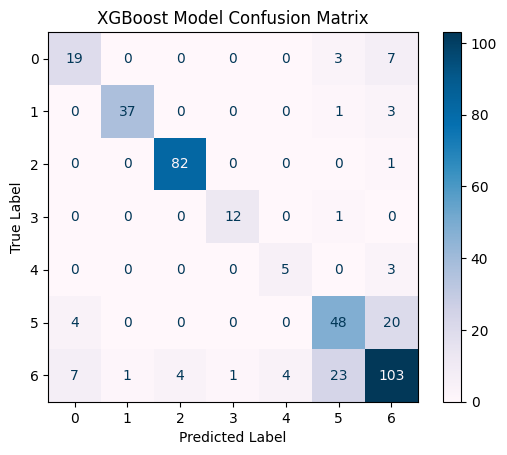

In [40]:
# Plot XGBoost Confusion Matrix
xgb_smote_model_cm = confusion_matrix(y_test, xgb_predictions)
ConfusionMatrixDisplay(confusion_matrix = xgb_smote_model_cm).plot(cmap = "PuBu")
plt.title("XGBoost Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(FIGURES_DIR / "xgboost-model-confusion-matrix.png")

### **Feature Importance**

Identifying the key features driving the predictions is essential to understand how the model makes decisions.

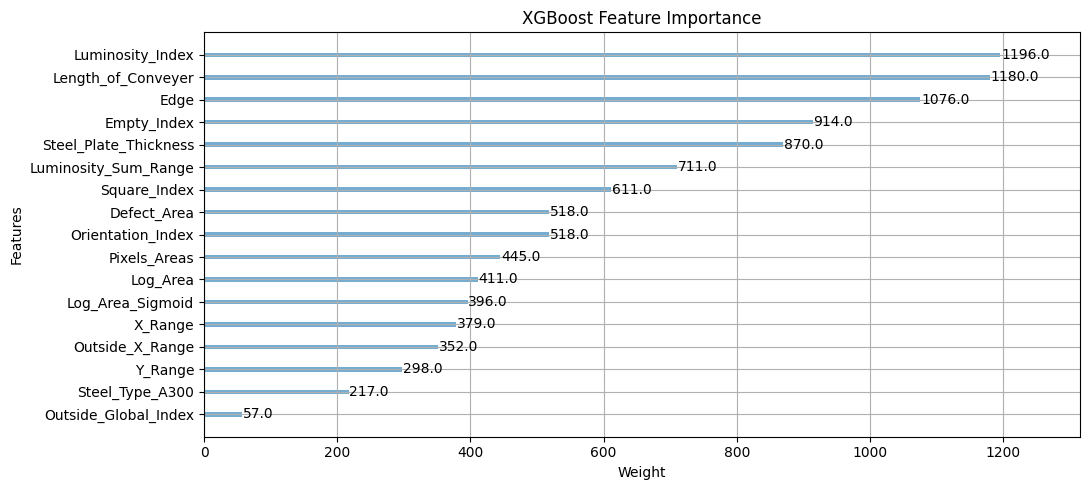

In [41]:
# Set names of features
real_feature_names = X.columns.tolist()

# Plot feature importance
fig, ax = plt.subplots(figsize = (11, 5))
xgb.plot_importance(
    xgb_smote_model,
    importance_type = "weight",
    color = "#74add1",
    ax = ax,
    title = "XGBoost Feature Importance",
    xlabel = "Weight",
    ylabel = "Features"
)

# Set ticks with feature names
yticklabels = ax.get_yticklabels()
new_labels = []

for label in yticklabels:
    name = label.get_text()
    if name.startswith("f") and name[1:].isdigit():
        index = int(name[1:])
        if index < len(real_feature_names):
            new_labels.append(real_feature_names[index])
        else:
            new_labels.append(name)
    else:
        new_labels.append(name)

# Set new labels
ax.set_yticklabels(new_labels)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "xgboost-model-feature-importance")


#### **ROC AUC**

Evaluate the model’s performance comprehensively.

In [42]:
# Binarize the output
y_bin = label_binarize(y_test, classes = [0, 1, 2, 3, 4, 5, 6])
y_score = xgb_smote_model.predict_proba(X_test_scaled)

# Compute ROC AUC for each class
roc_auc = roc_auc_score(y_bin, y_score, average = "macro")
print(f"XGBoost Model ROC AUC Score: {roc_auc:.2f}")

XGBoost Model ROC AUC Score: 0.97


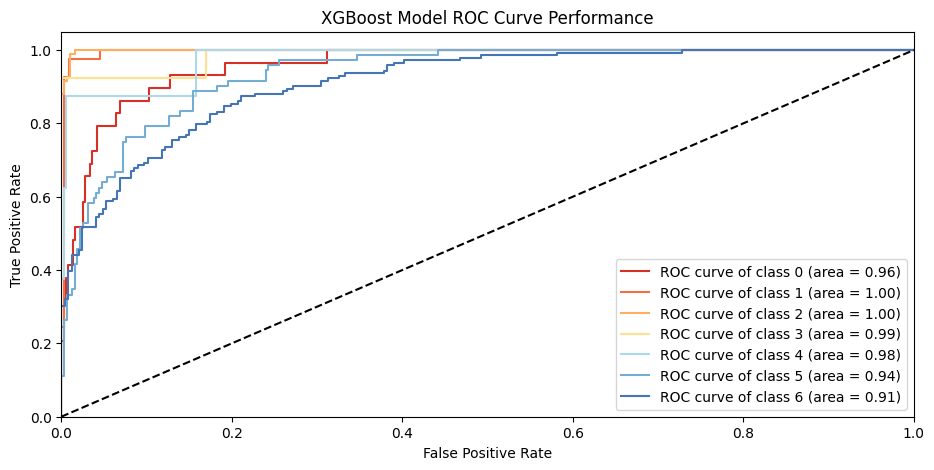

In [43]:
# Binarize the output
y_bin = label_binarize(y_test, classes = [0, 1, 2, 3, 4, 5, 6])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], xgb_smote_model.predict_proba(X_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the curves
plt.figure(figsize = (11, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color = colors[i], label = "ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost Model ROC Curve Performance")
plt.legend(loc = "lower right")
plt.savefig(FIGURES_DIR / "xgboost-model-roc-curve")

#### **Learning Curves**

Assess the model’s training behavior and identify any bias issues.

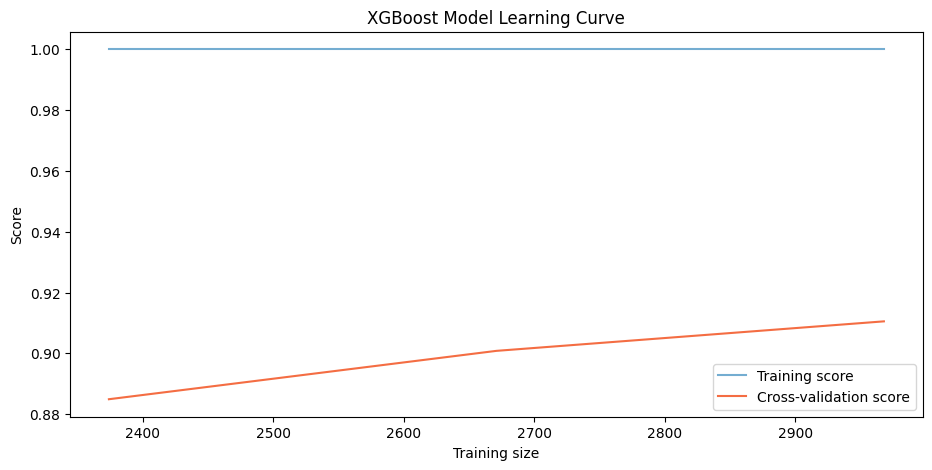

In [44]:
# Plot the learning curves of the model
plt.figure(figsize = (11, 5))

train_sizes, train_scores, test_scores = learning_curve(xgb_smote_model, X_resampled, y_resampled, cv = 5, n_jobs = -1, train_sizes = np.linspace(0.1, 1.0, 10))
train_scores_mean = train_scores.mean(axis = 1)
test_scores_mean = test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, color = "#74add1", label = "Training score")
plt.plot(train_sizes, test_scores_mean, color = "#f46d43", label = "Cross-validation score")
plt.title("XGBoost Model Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Score")
plt.legend(loc = "best")
plt.savefig(FIGURES_DIR / "xgboost-model-learning-curve")

#### **Precision-Recall Curve**

Evaluate the model’s performance in terms of precision and recall, which is especially useful in cases of imbalanced classes.

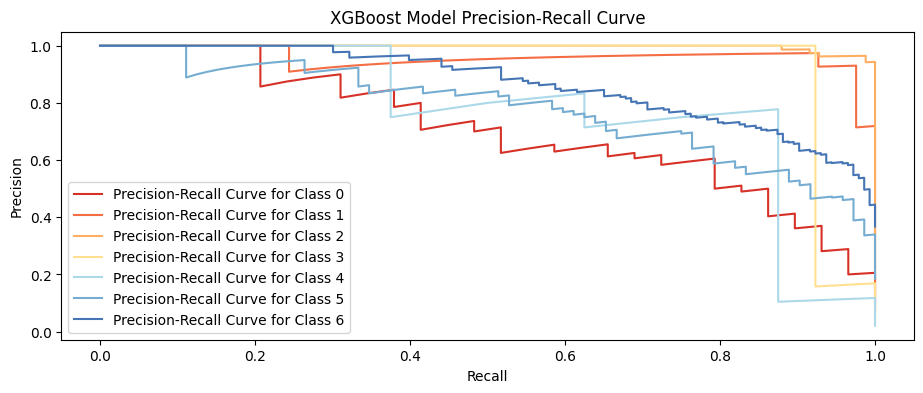

In [45]:
# Plot the precision-recall curve
plt.figure(figsize=(11, 4))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], xgb_smote_model.predict_proba(X_test_scaled)[:, i])
    plt.plot(recall, precision, color = colors[i], label = f"Precision-Recall Curve for Class {i}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("XGBoost Model Precision-Recall Curve")
plt.legend(loc = "lower left")
plt.savefig(FIGURES_DIR / "xgboost-model-precision-recall-curve")

## Conclusiones

The goal of this project was to build a machine learning model to detect anomalies or defects in industrial steel plates. To achieve this, the process started with cleaning the dataset, a crucial step to ensure the integrity and reliability of the data. Then, a detailed exploratory analysis was performed to better understand the distribution and relationships between variables. This included evaluating each variable individually and exploring significant interactions between pairs of variables. This analysis helped create new features that simplified the modeling process.

To find the best model for predicting anomalies, several approaches were tested: decision tree, random forest, XGBoost, support vector machine, and multilayer perceptron. XGBoost was found to deliver the best performance. Afterward, hyperparameter tuning was carried out to optimize the model. Since the data exploration revealed class imbalance, the resampling technique SMOTE was applied. This model not only showed the highest performance but also excelled in precision and recall.

In summary, a robust machine learning model was built that can effectively distinguish between minority and majority classes, delivering solid performance and proving to be the best choice to solve this problem.